# Initialisations

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Paths
extended_path = '.Data/palmerpenguins_extended.csv'
original_path = '.Data/palmerpenguins_original.csv'

In [2]:
df_extended = pd.read_csv(extended_path)
df_original = pd.read_csv(original_path)
print(df_original.columns)
print(df_extended.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage',
       'health_metrics', 'year'],
      dtype='object')


The extended version has three extra variables; `diet`, `life_stage`, and `health_metrics` to aid prediction

As well as being able to predict the penguin correctly I also want to work out if the three extra variables are actually useful.

I'm also going to drop `year` because that is not a feature of a penguin 

In [3]:
df = df_extended.copy()
df = df.drop(['year'], axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight
...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy


In [4]:
#Are there any missing values?
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
dtype: int64

In [5]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
diet                  object
life_stage            object
health_metrics        object
dtype: object

In [6]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
count,3430,3430,3430.000000,3430.000000,3430.000000,3430.000000,3430,3430,3430,3430
unique,3,3,NaN,NaN,NaN,NaN,2,4,3,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,female,krill,juvenile,healthy
freq,1560,1785,NaN,NaN,NaN,NaN,1726,1419,1541,1550
mean,NaN,NaN,38.529825,18.447143,207.028863,4834.710496,NaN,NaN,NaN,NaN
std,NaN,NaN,13.175171,2.774428,28.944765,1311.091310,NaN,NaN,NaN,NaN
min,NaN,NaN,13.600000,9.100000,140.000000,2477.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,28.900000,16.600000,185.000000,3843.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,34.500000,18.400000,203.000000,4633.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,46.600000,20.300000,226.000000,5622.000000,NaN,NaN,NaN,NaN


# Class imbalance investigation

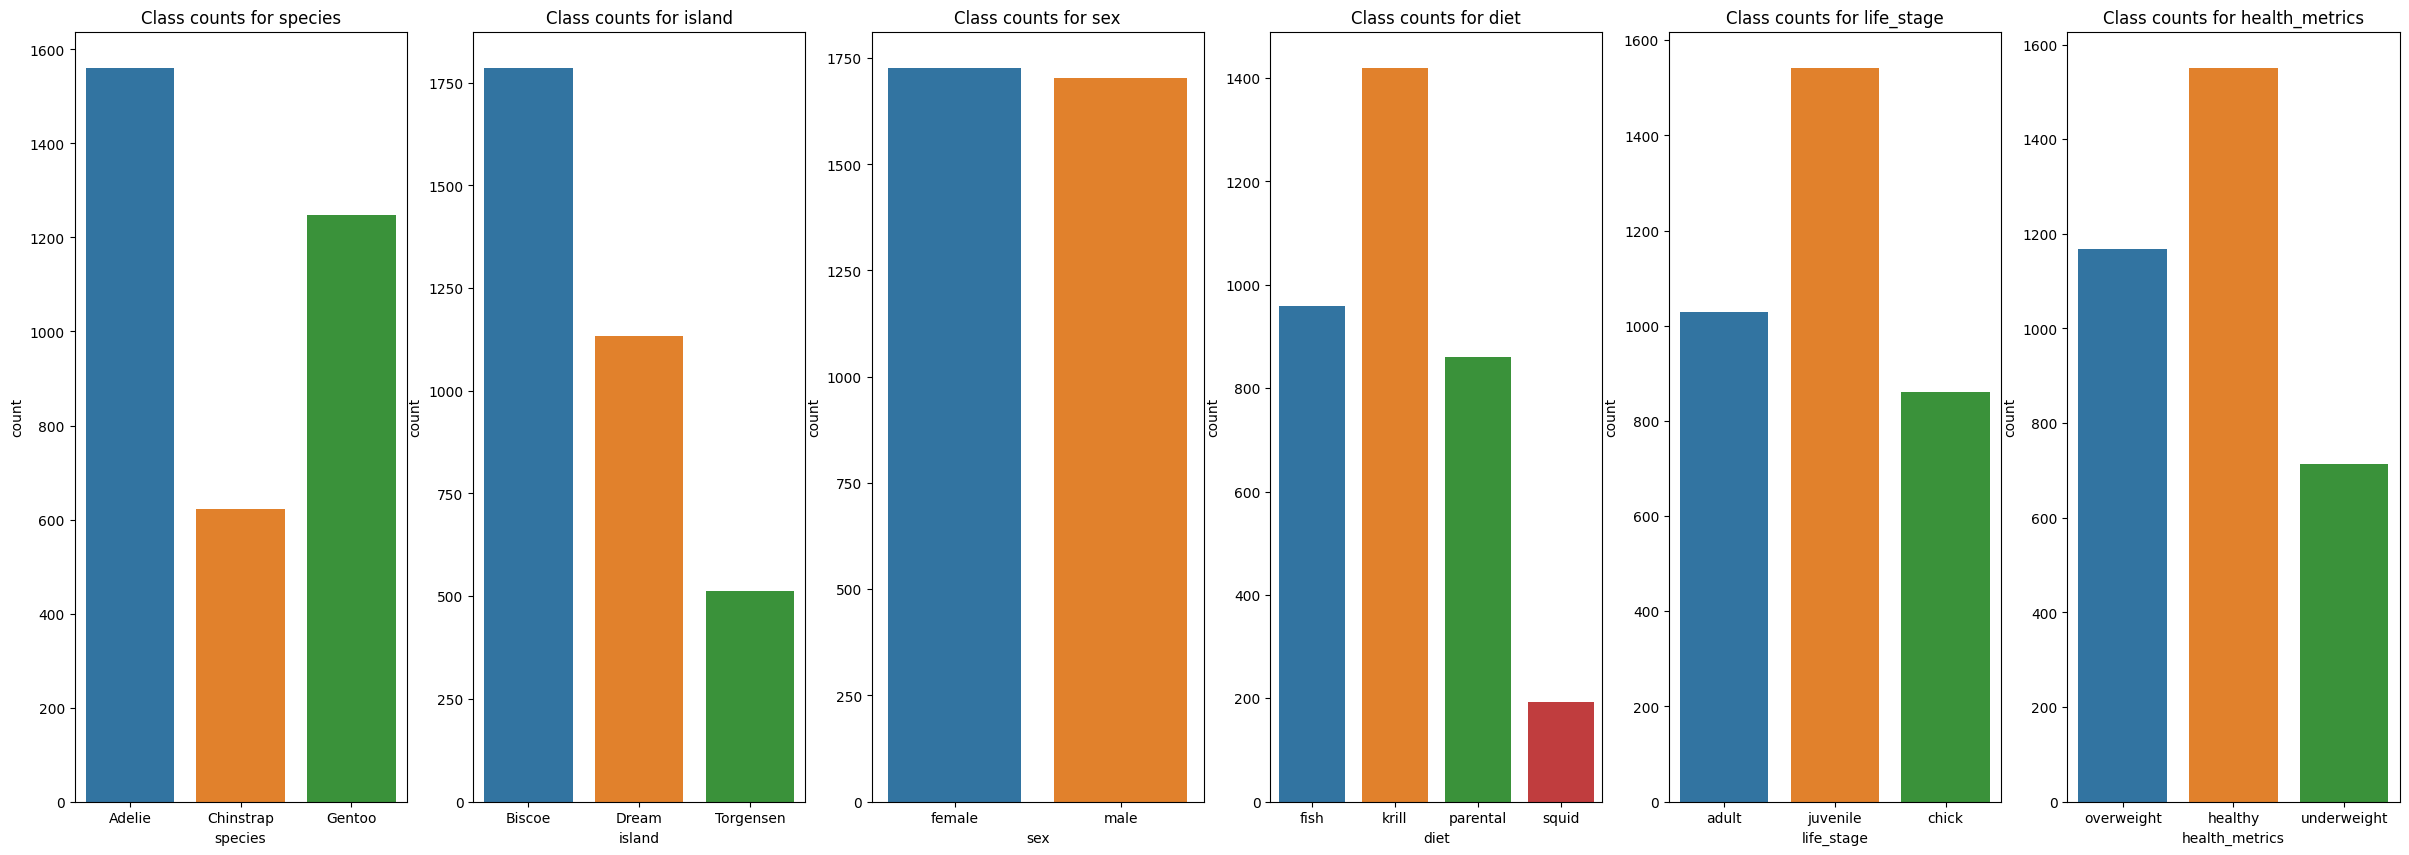

In [7]:
#Check class imbalances
cols = ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']
nCols = len(cols)
fig, ax = plt.subplots(1,nCols, figsize=(5*nCols,10))
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].set_title('Class counts for ' + col)


Warning there is a class imbalances here; 
`species`: Chinstraps are underrepresented. Will need to be careful in the train-val-test split. Also for multi-class metric I should use either the F1 score or matthew's correlation co-efficient. Simple descriptions [here](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)

The others may vary due to the classes so I won't be too worried

# Investigation into correlations

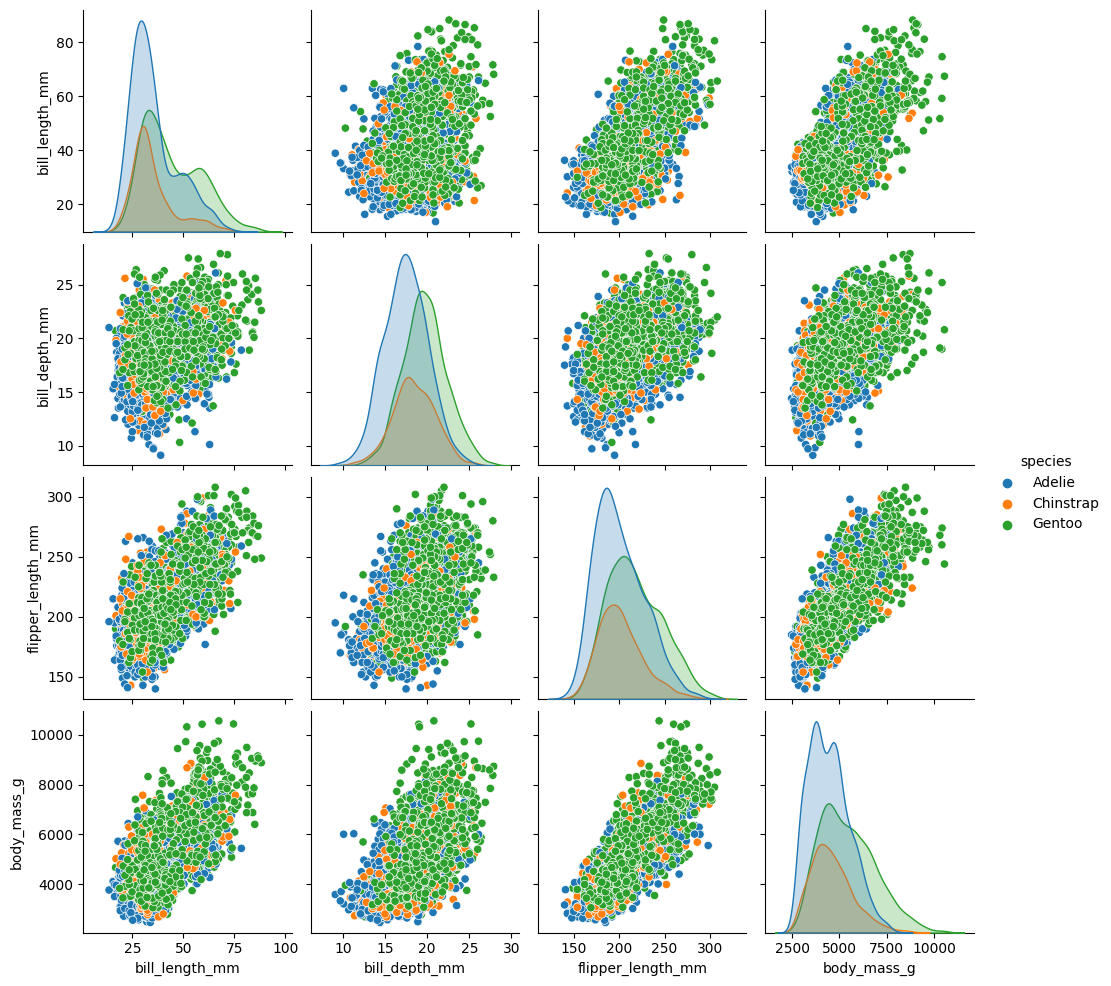

In [8]:
#Correlations between numeric values
sns.pairplot(data=df, hue='species')

Diagonals show that there is significant overal between all three groups, meaning any single numeric feature is unlikely to estimate the penguin type. (i.e. a combination of values is needed)

Additionally for all the individual scatterplots there doesn't seem to be a tight correlation. Just a general positive correlation.

# Look for correlations between object and float data types

In [9]:
#Get the Object and Float columns
Cols = df.columns
NumericCols = []
ObjectCols = []
for c in Cols:
    type = df[c].dtype
    if type == 'object':
        ObjectCols.append(c)
    elif type == 'float64':
        NumericCols.append(c)
print(NumericCols)
print(ObjectCols)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']


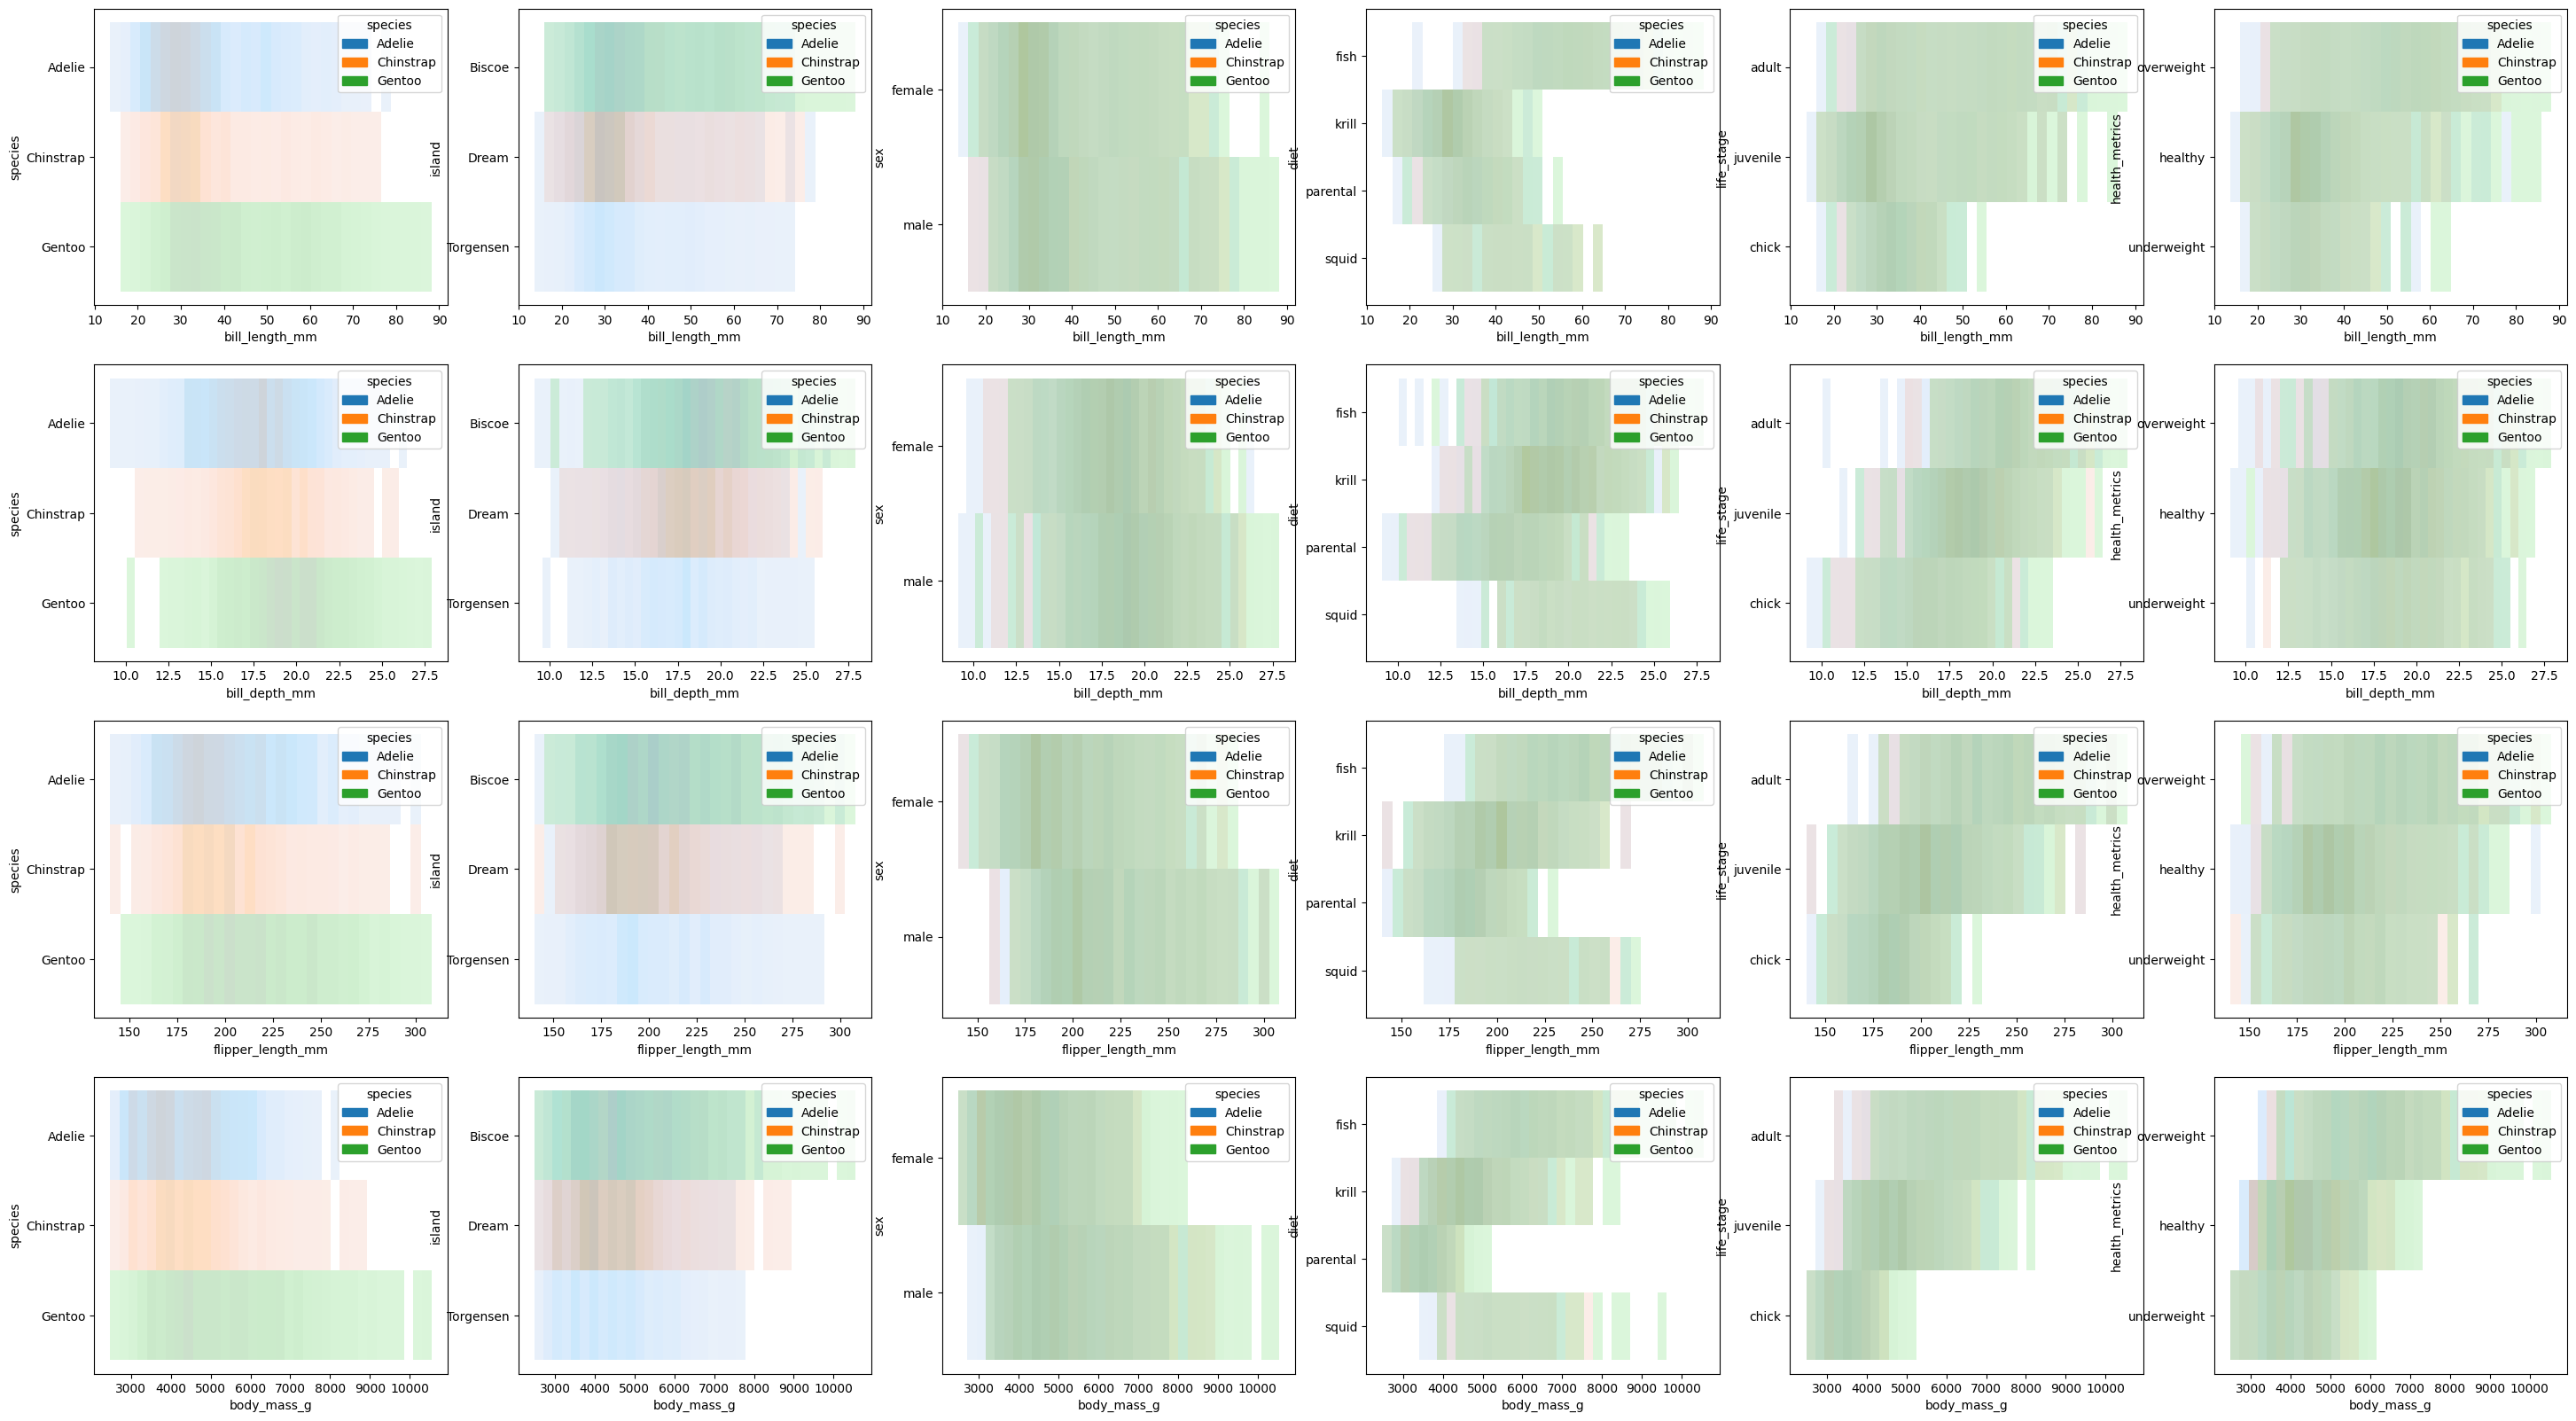

In [10]:
nRow = len(NumericCols)
nCol = len(ObjectCols)
fig, ax = plt.subplots(nRow,nCol, figsize=(nCol*6,nRow*5))
for r, nc in enumerate(NumericCols):
    for c, oc in enumerate(ObjectCols):
        sns.histplot(data=df, hue=ObjectCols[0], x=nc, y=oc, ax=ax[r,c], alpha=0.25)

Finding is that for most of the features there is a really big overlap, apart from the island that the penguins were found (2nd column). For the islands there is still some overlap but not a large amount. Let's just check this with a simple countplot

<Axes: xlabel='island', ylabel='count'>

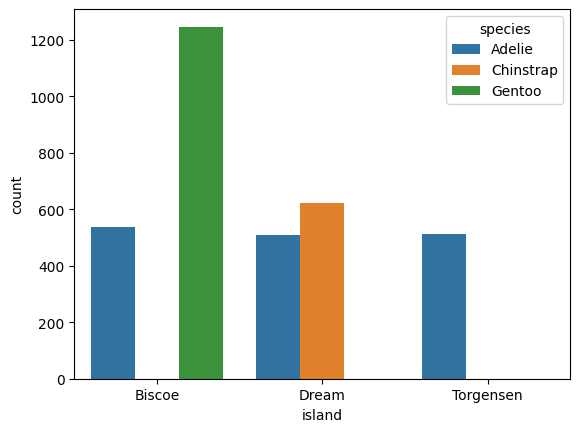

In [11]:
sns.countplot(data=df, x='island', hue='species')

Ok so Adelie penguins are found on all the islands, whereas Chinstrap penguins are only on Dream island, and Gentoo's were only found on Biscoe. See the map attached credit: [Gorman et al 2014 - Fig1](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)

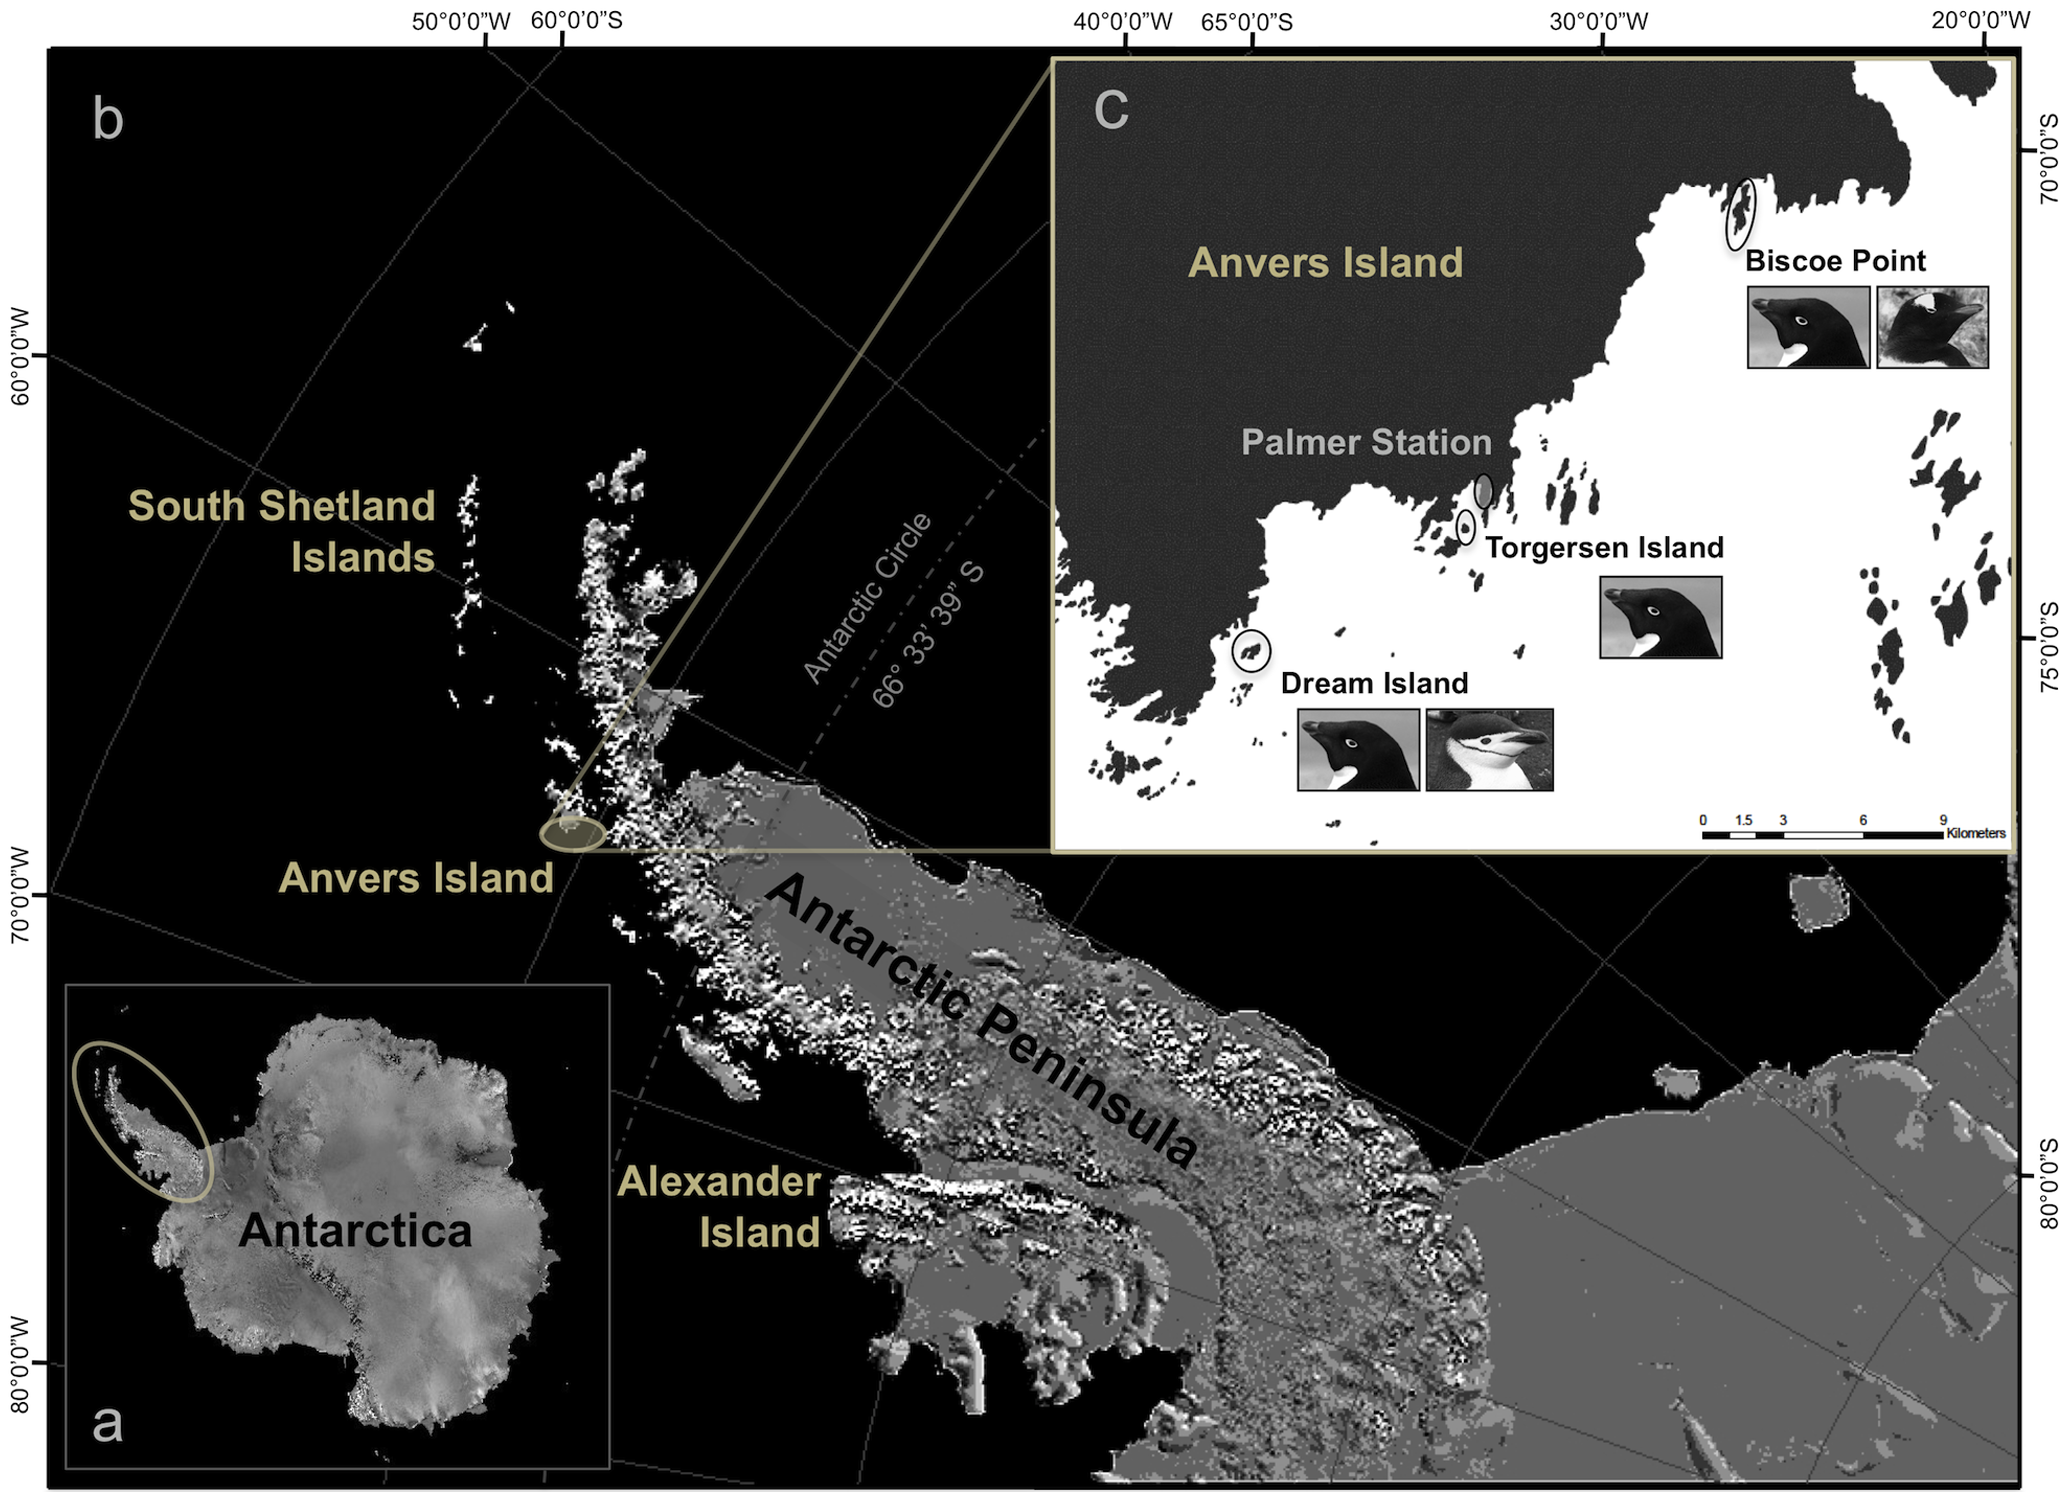

To be honest I think the location is maybe cheating a bit, and not at all revealing about the characteristics of the penguin so I will ignore it

# Can I segregate the data?
So here we have a interesting challenge, based on the metrics measured there is no clear difference between the different penguins. Could a combination of all these different features somehow segregate it? To do this I will
* Drop the `island` field makes classification too easy and just a binary decision and doesn't relate to the penguins
* Vectorise the object fields so that they are quantifiable
    * Ordinal Encoded: `life_stage` and `health_metrics` and `sex`
    * One-hot Encoding: `diet`
* Normalise the data
* PCA to see if the data segregates nicely in an unbiassed way.
* If that fails try Fischer's LDA
* If that fails try UMAP

In [12]:
#Drop island
df_test = df.drop(['island'], axis=1)
df_test.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,Adelie,53.4,17.8,219.0,5687.0,female,fish,adult,overweight
1,Adelie,49.3,18.1,245.0,6811.0,female,fish,adult,overweight
2,Adelie,55.7,16.6,226.0,5388.0,female,fish,adult,overweight
3,Adelie,38.0,15.6,221.0,6262.0,female,fish,adult,overweight
4,Adelie,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight


## Encoding and Normalisation

In [13]:
#Ordinal encoding
Life_dict = {'chick':0,
            'juvenile':1,
            'adult':2}
Health_dict = {'underweight':0,
              'healthy':1,
              'overweight':2}
Sex_dict = {'female':0,
           'male':1}
EncodeDict = {'sex': Sex_dict,
              'life_stage': Life_dict,
              'health_metrics': Health_dict}
Test = df_test.replace(EncodeDict)
#One hot encoding
Test = pd.get_dummies(Test,columns=['diet'], drop_first=False)
display(Test)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,life_stage,health_metrics,diet_fish,diet_krill,diet_parental,diet_squid
0,Adelie,53.4,17.8,219.0,5687.0,0,2,2,True,False,False,False
1,Adelie,49.3,18.1,245.0,6811.0,0,2,2,True,False,False,False
2,Adelie,55.7,16.6,226.0,5388.0,0,2,2,True,False,False,False
3,Adelie,38.0,15.6,221.0,6262.0,0,2,2,True,False,False,False
4,Adelie,60.7,17.9,177.0,4811.0,0,1,2,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,44.0,20.4,252.0,6447.0,1,2,1,False,False,False,True
3426,Gentoo,54.5,25.2,245.0,6872.0,1,2,1,False,False,False,True
3427,Gentoo,51.4,20.4,258.0,7409.0,1,2,2,False,False,False,True
3428,Gentoo,55.9,20.5,247.0,6491.0,1,2,1,False,False,False,True


In [14]:
# Normalise the dataframe
from sklearn.preprocessing import MinMaxScaler
df_num = Test.drop(labels=['species'], axis=1)
mms = MinMaxScaler()
mms.fit(df_num)
data_norm = mms.transform(df_num)
df_norm = pd.DataFrame(data_norm, columns=mms.get_feature_names_out())
df_norm = pd.concat([Test[['species']],df_norm], axis=1)
display(df_norm)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,life_stage,health_metrics,diet_fish,diet_krill,diet_parental,diet_squid
0,Adelie,0.533512,0.462766,0.470238,0.397671,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Adelie,0.478552,0.478723,0.625000,0.536918,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,Adelie,0.564343,0.398936,0.511905,0.360629,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Adelie,0.327078,0.345745,0.482143,0.468905,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,Adelie,0.631367,0.468085,0.220238,0.289148,0.0,0.5,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,0.407507,0.601064,0.666667,0.491824,1.0,1.0,0.5,0.0,0.0,0.0,1.0
3426,Gentoo,0.548257,0.856383,0.625000,0.544475,1.0,1.0,0.5,0.0,0.0,0.0,1.0
3427,Gentoo,0.506702,0.601064,0.702381,0.611001,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3428,Gentoo,0.567024,0.606383,0.636905,0.497275,1.0,1.0,0.5,0.0,0.0,0.0,1.0


## PCA

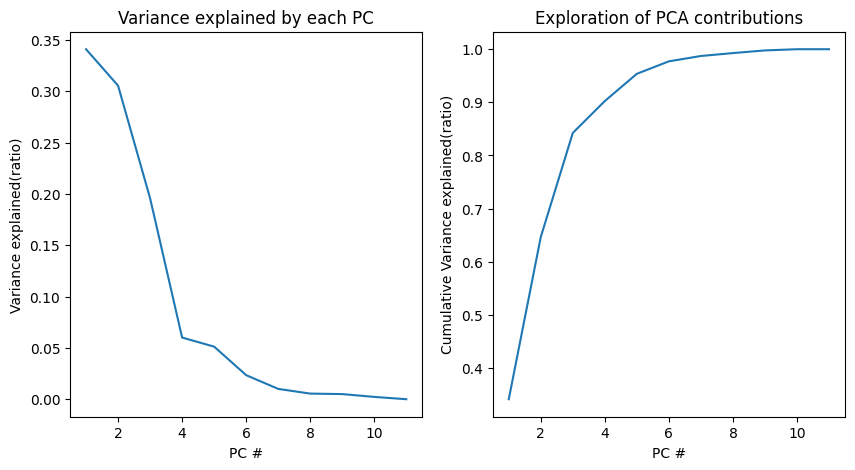

In [15]:
from sklearn.decomposition import PCA
data = df_norm.drop(['species'], axis=1)
maxD = data.shape[1]

pca = PCA(n_components=maxD)
pca.fit(data)
VarExp = pca.explained_variance_ratio_
nDim = np.arange(1,maxD+1)

PCA_df = pd.DataFrame({'PC':np.arange(1,maxD+1),'VarianceExplained':VarExp})
PCA_df['CumulativeVarExp'] = PCA_df['VarianceExplained'].cumsum()
# Now plot
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(nDim, VarExp)
ax[0].set_xlabel('PC #')
ax[0].set_ylabel('Variance explained(ratio)')
ax[0].set_title('Variance explained by each PC')

ax[1].plot(nDim, PCA_df['CumulativeVarExp'])
ax[1].set_xlabel('PC #')
ax[1].set_ylabel('Cumulative Variance explained(ratio)')
ax[1].set_title('Cumulative Variance explained by each PC')
plt.title('Exploration of PCA contributions')
plt.show()

There seems to be a cut off at around 6 principle components which may be helpful, but hasn't really cut down on the size a lot. But it may be useful. I will compare the 6 PCAs to the full dataset in order to see which will be better later on

Text(0.5, 1.0, 'PCA on Palmer Penguin data set')

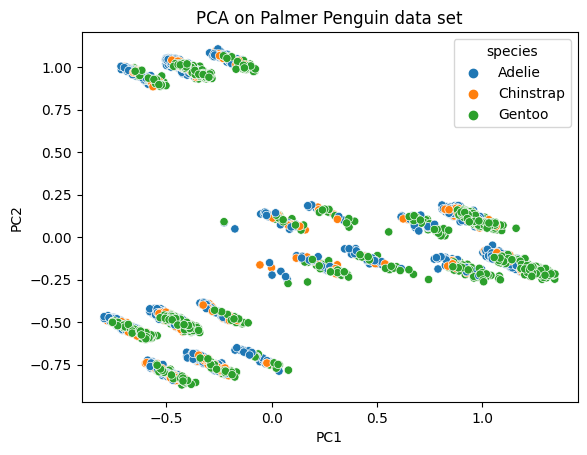

In [16]:
#Trial plotting the first 2 dimensions
nDim = 2
pca = PCA(n_components=nDim)
Xt = pca.fit_transform(data)
df_Xt = pd.DataFrame(Xt, columns=['PC1','PC2'])
df_Xt = pd.concat([df_norm['species'],df_Xt], axis=1)
sns.scatterplot(data=df_Xt, x='PC1', y='PC2', hue='species')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Palmer Penguin data set')

2 is clearly not enough, but there is some segregation going on

## Fischer's LDA
This will be slightly suboptimal for multi-class as they will be forced into ordinal classifications. This will not be used as a final ML solution but just to see if I can get a grasp on splitting the data

In [17]:
df_norm.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,life_stage,health_metrics,diet_fish,diet_krill,diet_parental,diet_squid
0,Adelie,0.533512,0.462766,0.470238,0.397671,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Adelie,0.478552,0.478723,0.625000,0.536918,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,Adelie,0.564343,0.398936,0.511905,0.360629,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Adelie,0.327078,0.345745,0.482143,0.468905,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,Adelie,0.631367,0.468085,0.220238,0.289148,0.0,0.5,1.0,1.0,0.0,0.0,0.0


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
#Encode the species
df_lda = df_norm.copy()
EncodeDict = {'species': 
              {'Adelie':0,
              'Chinstrap':1,
              'Gentoo':2}
             }
df_lda = df_lda.replace(EncodeDict)
MaxFolds = 5
for f in range(2,MaxFolds+1):
    kf = KFold(n_splits=f, shuffle=True, random_state=42)
    
    ExpVar = []
    RMSE = []
    
    for train, test in kf.split(df_lda):
        X_train = df_lda.iloc[train].drop(['species'], axis=1)
        X_test = df_lda.iloc[test].drop(['species'], axis=1)
        y_train = df_lda.iloc[train]['species']
        y_test = df_lda.iloc[test]['species']

        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train,y_train)
        y_pred = lda.predict_proba(X_test)[:,1]
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        expvar = lda.explained_variance_ratio_
        ExpVar.append(expvar)
        RMSE.append(rmse)

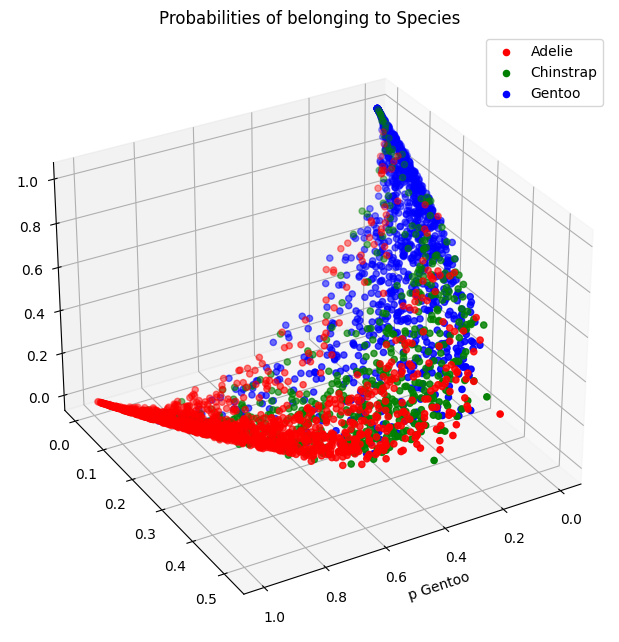

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

xyz = lda.predict_proba(df_lda.drop(['species'], axis=1))
for s in range(3):
    idx = df_lda['species']==s
    if s==0:
        ax.scatter3D(xyz[idx,0],xyz[idx,1],xyz[idx,2],c='r', label='Adelie')
    elif s==1:
        ax.scatter3D(xyz[idx,0],xyz[idx,1],xyz[idx,2],c='g', label='Chinstrap')
    elif s==2:
        ax.scatter3D(xyz[idx,0],xyz[idx,1],xyz[idx,2],c='b', label='Gentoo')
ax.legend()
ax.set_xlabel('p Adelie')
ax.set_xlabel('p Chinstrap')
ax.set_xlabel('p Gentoo')
ax.set_title('Probabilities of belonging to Species')
ax.view_init(elev=None, azim=60)

There are clear delinations! So we can predict the species, however as discussed earlier, the middle group (Chinstraps) are harder to predict because the discrimination is not discrete.

Text(0.5, 1.0, 'Accuracy of Prediction')

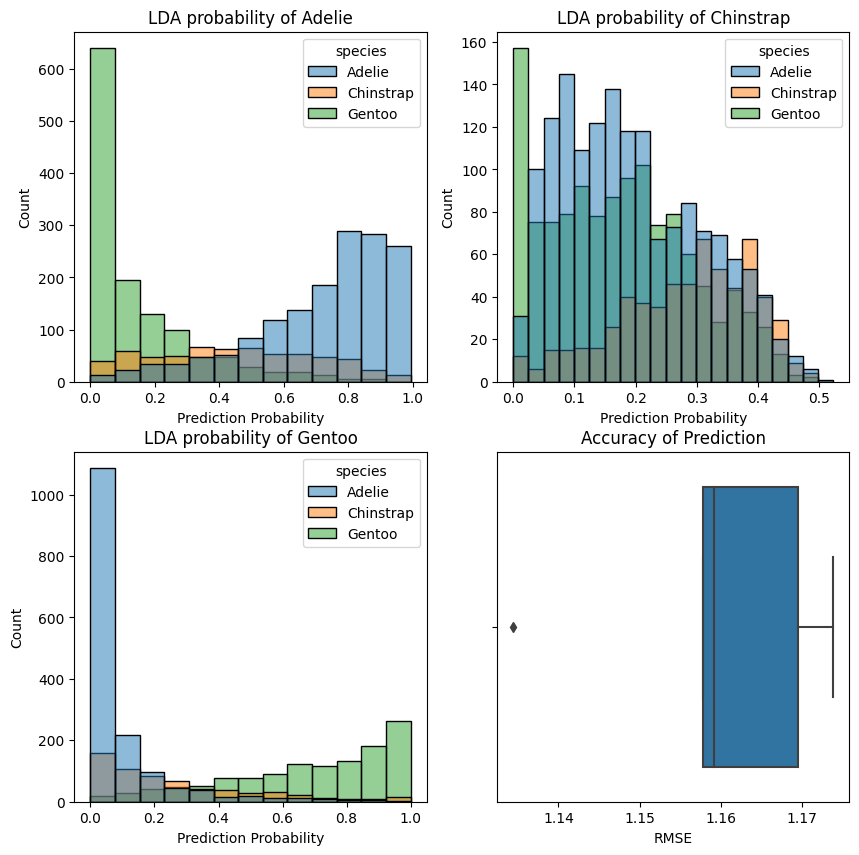

In [20]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
# Transform full data set and compare
probs = lda.predict_proba(df_lda.drop(['species'], axis=1))
y_0 = probs[:,0]
y_1 = probs[:,1]
y_2 = probs[:,2]
sns.histplot(x=y_0, hue=df['species'], ax=ax[0,0])
sns.histplot(x=y_1, hue=df['species'], ax=ax[0,1])
sns.histplot(x=y_2, hue=df['species'], ax=ax[1,0])
sns.boxplot(x=RMSE, ax=ax[1,1])

ax[0,0].set_xlabel('Prediction Probability')
ax[0,0].set_title('LDA probability of Adelie')
ax[0,1].set_xlabel('Prediction Probability')
ax[0,1].set_title('LDA probability of Chinstrap')
ax[1,0].set_xlabel('Prediction Probability')
ax[1,0].set_title('LDA probability of Gentoo')

ax[1,1].set_xlabel('RMSE')
ax[1,1].set_title('Accuracy of Prediction')

Interestingly as shown by the 3D plot it completely fails the chinstraps, but that is due to the classification method. Logistic Classification will produce much better results

# Model selection
The plan is to investigate a range of models including decision trees and maybe a neural network
* RandomForest
* XGBoost
* LightGBM
* SVM
* Logistic Regression
* MLPC (multi-layer perceptron classifier)

As a reminder I will optimise based on the F1 score, but I will create a dictionary where its optimum parameters, F1 score and columns used are stored. This means I will score the feature importances separately.

Additionally I will also try this on the first 6 PC features, this may also improve the speed of the algorithm

## Create train Val Test split
* Train: What the model will be trained on
* Validation: What the models will be evaluated on
* Test: The final predicted value of the chosen model

In [21]:
from sklearn.model_selection import train_test_split
X = df_norm.drop(labels=['species'], axis=1)
y = df_norm['species'].replace({'Adelie':0,
                               'Chinstrap':1,
                               'Gentoo':2})

#Perform PCA
pca = PCA(n_components=6)
Xpca = pca.fit_transform(X)
Xpca = pd.DataFrame(Xpca, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

#Train, test, validation splits
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

Xpca_train, Xpca_valtest, ypca_train, ypca_valtest = train_test_split(Xpca, y, test_size=0.2, random_state=42)
Xpca_val, Xpca_test, ypca_val, ypca_test = train_test_split(Xpca_valtest, ypca_valtest, test_size=0.5, random_state=42)

print("Train size: ",X_train.shape)
print("Validation size: ",X_val.shape)
print("Test size: ",X_test.shape)

Train size:  (2744, 11)
Validation size:  (343, 11)
Test size:  (343, 11)


In [22]:
#Basic libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Set up a dictionary to store information about models
Model_dict = {
    'Model': [],
    'PCA': [],
    'F1_Score': [],
    'Parameters': [],
    'Time': []
}

## Random Forest
### All variables

In [23]:
from sklearn.ensemble import RandomForestClassifier
#No Feature Engineering    
Param_Grid = {'n_estimators': [40, 50, 60],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [30,40, 50],
              'min_samples_leaf': [1],
              'max_features' : [None]
             }

rfc = RandomForestClassifier()

Grid_Search = GridSearchCV(
    estimator = rfc,
    param_grid = Param_Grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'f1_micro',
    verbose = 1
)
Grid_Search.fit(X_train,y_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
RFC_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(X_val)
print (classification_report(y_val, y_pred))

#Add in Random Forest model
Model_dict['Model'].append('Random Forest Classifier')
Model_dict['PCA'].append('n')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best score: 0.7034
	criterion: 'entropy'
	max_depth: 40
	max_features: None
	min_samples_leaf: 1
	n_estimators: 50
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       148
           1       0.38      0.18      0.25        65
           2       0.77      0.82      0.79       130

    accuracy                           0.71       343
   macro avg       0.62      0.61      0.60       343
weighted avg       0.67      0.71      0.68       343



That's pretty poor as scores go. Especially for the chinstraps. Let's try the PCA values now
### PCA variables

In [24]:
#RFC with PC1-6
Param_Grid = {'n_estimators': [30, 40, 50],
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [50, 75, 100],
              'min_samples_leaf': [1],
              'max_features' : [None]
             }

rfc = RandomForestClassifier()

Grid_Search = GridSearchCV(
    estimator = rfc,
    param_grid = Param_Grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'f1_micro',
    verbose = 1
)
Grid_Search.fit(Xpca_train,ypca_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
RFCpca_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(Xpca_val)
print (classification_report(ypca_val, y_pred))

#Add in Random Forest model
Model_dict['Model'].append('Random Forest Classifier')
Model_dict['PCA'].append('y')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best score: 0.6986
	criterion: 'log_loss'
	max_depth: 75
	max_features: None
	min_samples_leaf: 1
	n_estimators: 40
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       148
           1       0.31      0.14      0.19        65
           2       0.76      0.84      0.80       130

    accuracy                           0.70       343
   macro avg       0.60      0.60      0.59       343
weighted avg       0.66      0.70      0.67       343



Odd PCA is not much better at all

## XGBoost
### All variables

In [25]:
from xgboost import XGBClassifier
    
Param_Grid = {'max_depth': [2, 5, 7],
              'learning_rate': [0.02, 0.04, 0.05],
              'n_estimators': [400, 500, 600],
              'gamma' : [0],
              'min_child_weight': [0.01, 0.1, 0.2]
             }
#No feature engineering
xgb = XGBClassifier()
Grid_Search = GridSearchCV(
    estimator = xgb,
    param_grid = Param_Grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'f1_micro',
    verbose = 1
)
Grid_Search.fit(X_train,y_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
XGB_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(X_val)
print (classification_report(y_val, y_pred))

#Add in XGBoost model
Model_dict['Model'].append('XGBoost')
Model_dict['PCA'].append('n')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score: 0.7751
	gamma: 0
	learning_rate: 0.04
	max_depth: 5
	min_child_weight: 0.1
	n_estimators: 400
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       148
           1       0.45      0.23      0.31        65
           2       0.85      0.89      0.87       130

    accuracy                           0.77       343
   macro avg       0.69      0.67      0.67       343
weighted avg       0.74      0.77      0.74       343



Better but not great

In [26]:
Grid_Search.fit(Xpca_train,ypca_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
XGBpca_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(Xpca_val)
print (classification_report(ypca_val, y_pred))

#Add in XGBoost model
Model_dict['Model'].append('XGBoost')
Model_dict['PCA'].append('y')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score: 0.6972
	gamma: 0
	learning_rate: 0.05
	max_depth: 5
	min_child_weight: 0.1
	n_estimators: 400
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       148
           1       0.09      0.03      0.05        65
           2       0.76      0.85      0.80       130

    accuracy                           0.68       343
   macro avg       0.51      0.56      0.53       343
weighted avg       0.60      0.68      0.63       343



## Light GBM
### All variables

In [27]:
#All variables
import lightgbm as LGB
#from lightgbm import LGBMClassifier
    
Param_Grid = {'boosting_type': ['gbdt'],
              'num_leaves': [10, 20, 30],
              'learning_rate': [0.001, 0.025, 0.05],
              'n_estimators': [400, 500, 600],
              'min_child_samples': [1, 5, 10]
             }                         
                                                  
lgb = LGB.LGBMClassifier(objective='multiclass', random_state=42, max_depth=-1)

Grid_Search = GridSearchCV(
    estimator = lgb,
    param_grid = Param_Grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'f1_micro',
    verbose = 1
)
Grid_Search.fit(X_train,y_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
LGBM_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(X_val)
print (classification_report(y_val, y_pred))

#Add in LGBM model
Model_dict['Model'].append('LGBM')
Model_dict['PCA'].append('n')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score: 0.7744
	boosting_type: 'gbdt'
	learning_rate: 0.025
	min_child_samples: 5
	n_estimators: 500
	num_leaves: 20
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       148
           1       0.56      0.28      0.37        65
           2       0.83      0.88      0.86       130

    accuracy                           0.78       343
   macro avg       0.72      0.69      0.69       343
weighted avg       0.75      0.78      0.75       343



### PCA components

In [ ]:
Grid_Search.fit(Xpca_train,ypca_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
LGBMpca_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(Xpca_val)
print (classification_report(ypca_val, y_pred))

#Add in LGBM model
Model_dict['Model'].append('LGBM')
Model_dict['PCA'].append('y')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


## Support Vector Machine
### All variables

In [ ]:
from sklearn.svm import SVC
Param_Grid = {'C': [0.5, 0.75, 1, 1.25, 2],
              'kernel': ['rbf'],
              'gamma': ['scale']
             }

svc = SVC(random_state=42)

Grid_Search = GridSearchCV(
    estimator = svc,
    param_grid = Param_Grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'f1_micro',
    verbose = 1
)
Grid_Search.fit(X_train,y_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
SVC_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(X_val)
print (classification_report(y_val, y_pred))

#Add in SVM model
Model_dict['Model'].append('SVC')
Model_dict['PCA'].append('n')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

### PCA

In [ ]:
Grid_Search.fit(Xpca_train,ypca_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
SVCpca_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(Xpca_val)
print (classification_report(ypca_val, y_pred))

#Add in SVM model
Model_dict['Model'].append('SVC')
Model_dict['PCA'].append('y')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

## Logistic Regression Classifier
### All vaiables

In [ ]:
from sklearn.linear_model import LogisticRegression
Param_Grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
              'C': [0.0001, 0.001, 0.005],
              'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
              'max_iter': [25, 50, 100, 150]
             }

lrc = LogisticRegression(random_state=42, multi_class='multinomial')
Grid_Search = GridSearchCV(
    estimator = lrc,
    param_grid = Param_Grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'f1_micro',
    verbose = 1
)

Grid_Search.fit(X_train,y_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
LRC_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(X_val)
print (classification_report(y_val, y_pred))

#Add in LRC model
Model_dict['Model'].append('LRC')
Model_dict['PCA'].append('n')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

In [ ]:
Grid_Search.fit(Xpca_train,ypca_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
LRCpca_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(Xpca_val)
print (classification_report(ypca_val, y_pred))

#Add in LRC model
Model_dict['Model'].append('LRC')
Model_dict['PCA'].append('y')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

## MLPC (multi-layer perceptron classifier)
### All variables

In [ ]:
from sklearn.neural_network import MLPClassifier
Param_Grid = {'hidden_layer_sizes':[10,8,6,4],
              'activation': ['identity','logisitc','tanh','relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.01,0.001]
             }
mlpc = MLPCLassifier(random_state=42)
Grid_Search = GridSearchCV(
    estimator = lrc,
    param_grid = Param_Grid,
    n_jobs = -1,
    cv = 5,
    scoring = 'f1_micro',
    verbose = 1
)

In [ ]:
Grid_Search.fit(X_train,y_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
MLPC_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(X_val)
print (classification_report(y_val, y_pred))

#Add in mlpc model
Model_dict['Model'].append('mlpc')
Model_dict['PCA'].append('n')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

In [ ]:
Grid_Search.fit(Xpca_train,ypca_train)
Best_Parameters = Grid_Search.best_estimator_.get_params()
LRCpca_Params = Best_Parameters
print (f'Best score: {np.round(Grid_Search.best_score_,4)}')
for Param_Name in sorted(Param_Grid.keys()):
    print ('\t%s: %r' %(Param_Name, Best_Parameters[Param_Name]))

y_pred = Grid_Search.predict(Xpca_val)
print (classification_report(ypca_val, y_pred))

#Add in mlpc model
Model_dict['Model'].append('mlpc')
Model_dict['PCA'].append('y')
Model_dict['F1_Score'].append(Grid_Search.best_score_)
Model_dict['Parameters'].append(Best_Parameters)
Model_dict['Time'].append(Grid_Search.refit_time_)

# Evaluate models on the test set

In [ ]:
# Evaluate the models on the test set
Model_Test={'Model':[],'F1_Score':[],'PCA':[]}

#Random Forest Classifier
rfc = RandomForestClassifier(**RFC_Params)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('Random Forest')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('n')

rfc = RandomForestClassifier(**RFCpca_Params)
rfc.fit(Xpca_train, ypca_train)
y_pred = rfc.predict(Xpca_test)
f1 = f1_score(ypca_test,y_pred)
Model_Val['Model'].append('Random Forest_PCA')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('y')

#XGBoost
xgb = XGBClassifier(**XGB_Params)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('XGBoost')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('n')

xgb = XGBClassifier(**XGBpca_Params)
xgb.fit(Xpca_train,ypca_train)
y_pred = xgb.predict(Xpca_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('XGBoost_PCA')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('y')

#LightGB
lgb = LGB.LGBMClassifier(**LGB_Params)
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('LGBM')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('n')

lgb = LGB.LGBMClassifier(**LGBpca_Params)
lgb.fit(Xpca_train,ypca_train)
y_pred = lgb.predict(Xpca_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('LGBM_PCA')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('y')

#Support Vector Classifier
svc = SVC(**SVC_Params)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('SVC')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('n')

svc = SVC(**SVCpca_Params)
svc.fit(Xpca_train,ypca_train)
y_pred = svc.predict(Xpca_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('SVC_PCA')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('y')

#Logistic Regression Classifier
lrc = LogisticRegression(**LR_Params)
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('LogRegressor')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('n')

lrc = LogisticRegression(**LRpca_Params)
lrc.fit(Xpca_train,ypca_train)
y_pred = lrc.predict(Xpca_test)
f1 = f1_score(y_test,y_pred)
Model_Val['Model'].append('LogRegressor_PCA')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('y')

#MLPC
mlpc = MLPCLassifier(**MLPC_Params)
mmlpc.fit(X_train,y_train)
y_pred = mlpc.predict(X_val)
f1 = f1_score(y_val,y_pred)
Model_Val['Model'].append('MLPC')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('n')

mlpc = LogisticRegression(**MLPCpca_Params)
mlpc.fit(Xpca_train,ypca_train)
y_pred = mlpc.predict(Xpca_val)
f1 = f1_score(y_val,y_pred)
Model_Val['Model'].append('MLPC_PCA')
Model_Val['F1_Score'].append(f1)
Model_Val['PCA'].append('y')

In [ ]:
# Now plot the results
fig, ax = plt.subplots(2,1, figsize=(20,10))
sns.barplot(data = Model_dict, x = 'Model', y = 'F1_Score', hue='PCA', ax=ax[0])
ax[0].set_ylim(0.8,1)
ax[0].set_title('On training data')
sns.barplot(data = Model_Val, x = 'Model',y = 'F1_Score', ax=ax[1])
ax[1].set_ylim(0.8,1)
ax[1].set_title('On validation data')

display(pd.DataFrame(Model_Val))

In [ ]:
display(pd.DataFrame(Model_dict))